In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Collect Data

Collect data from various sources, such as online car marketplaces, car dealerships, and car auction houses. The data should include information such as the manufacturer, model, year, mileage, engine size, fuel type, body type, transmission, and price.




In [2]:
df1 = pd.read_csv('cars.csv', low_memory=False)
df1.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,state,drivetrain,price_usd,number_of_photos
0,Alfa Romeo,159,mechanical,black,237000.0,2007.0,diesel,diesel,2.4,sedan,owned,front,10500.0,22.0
1,Alfa Romeo,155,mechanical,other,235009.0,1994.0,diesel,diesel,1.9,sedan,owned,front,1000.0,4.0
2,Alfa Romeo,156,mechanical,green,330000.0,1999.0,gas,gasoline,2.0,sedan,owned,front,2200.0,6.0
3,Alfa Romeo,156,mechanical,black,300000.0,1998.0,gas,gasoline,1.8,sedan,owned,front,1800.0,11.0
4,Alfa Romeo,GTV,mechanical,black,138000.0,1998.0,gas,gasoline,2.0,coupe,owned,front,6000.0,14.0


In [3]:
df1.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,state,drivetrain,price_usd,number_of_photos
0,Alfa Romeo,159,mechanical,black,237000.0,2007.0,diesel,diesel,2.4,sedan,owned,front,10500.0,22.0
1,Alfa Romeo,155,mechanical,other,235009.0,1994.0,diesel,diesel,1.9,sedan,owned,front,1000.0,4.0
2,Alfa Romeo,156,mechanical,green,330000.0,1999.0,gas,gasoline,2.0,sedan,owned,front,2200.0,6.0
3,Alfa Romeo,156,mechanical,black,300000.0,1998.0,gas,gasoline,1.8,sedan,owned,front,1800.0,11.0
4,Alfa Romeo,GTV,mechanical,black,138000.0,1998.0,gas,gasoline,2.0,coupe,owned,front,6000.0,14.0


In [4]:
df2 = pd.read_csv('cars2.csv', low_memory=False)
df2.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,number_of_photos,up_counter,duration_listed
0,Alfa Romeo,159,mechanical,black,237000,2007,diesel,diesel,2.4,sedan,False,owned,front,10500.0,False,22,15,58
1,Alfa Romeo,155,mechanical,other,235009,1994,diesel,diesel,1.9,sedan,False,owned,front,1000.0,False,4,13,27
2,Alfa Romeo,156,mechanical,green,330000,1999,gasoline,gasoline,2.0,sedan,False,owned,front,2200.0,True,6,16,159
3,Alfa Romeo,156,mechanical,black,300000,1998,gasoline,gasoline,1.8,sedan,False,owned,front,1800.0,False,11,4,4
4,Alfa Romeo,GTV,mechanical,black,138000,1998,gasoline,gasoline,2.0,coupe,False,owned,front,6000.0,False,14,125,242


In [5]:
# check if they are the same
if df1.equals(df2):
    print("The DataFrames are the same")
else:
    print("The DataFrames are different")

The DataFrames are different


# Clean Data

Once you have collected the data, clean it by removing any missing or duplicate values, correcting any inconsistencies, and standardizing the data.

get dataframes shape

In [6]:
df1.shape

(1048573, 14)

In [7]:
df2.shape

(36023, 18)

lets see what columns each have.

In [8]:
df1.columns

Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_type',
       'engine_capacity', 'body_type', 'state', 'drivetrain', 'price_usd',
       'number_of_photos'],
      dtype='object')

In [9]:
df2.columns

Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_type',
       'engine_capacity', 'body_type', 'has_warranty', 'state', 'drivetrain',
       'price_usd', 'is_exchangeable', 'number_of_photos', 'up_counter',
       'duration_listed'],
      dtype='object')

join the two columns and get the unique columns

In [10]:
unique_columns = list(set(list(df1.columns) + list(df2.columns)))
unique_columns

['drivetrain',
 'engine_type',
 'has_warranty',
 'price_usd',
 'up_counter',
 'body_type',
 'state',
 'duration_listed',
 'is_exchangeable',
 'model_name',
 'engine_capacity',
 'engine_fuel',
 'color',
 'transmission',
 'manufacturer_name',
 'number_of_photos',
 'odometer_value',
 'year_produced']

In [11]:
# get columns in df2 but not in df1
missing_cols = df2.columns.difference(df1.columns)

print(missing_cols)

Index(['duration_listed', 'has_warranty', 'is_exchangeable', 'up_counter'], dtype='object')


In [12]:
# verify
for i in ['duration_listed', 'has_warranty', 'is_exchangeable', 'up_counter']:
    if i in df1.columns:
        print('yes')

It appears that df1 does not contain the required columns, so we can obtain them by selecting the missing columns from df2 using indexing.

Before indexing the missing columns from df2, let's drop them and verify if the entries in df1 are equivalent to those in df2 without the missing columns.

In [13]:
# check if they are the same
if df1.equals(df2.drop(missing_cols, axis=1)):
    print("The DataFrames are the same")
else:
    print("The DataFrames are different")

The DataFrames are different


the two dataframes still have different entries after dropping the missing columns from df2, we can join the two dataframes and check for duplicates. If duplicates are found, we can drop them.

In [14]:
merged_df = pd.merge(df1, df2)
merged_df.head()


,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,state,drivetrain,price_usd,number_of_photos,has_warranty,is_exchangeable,up_counter,duration_listed
0,Alfa Romeo,159,mechanical,black,237000.0,2007.0,diesel,diesel,2.4,sedan,owned,front,10500.0,22.0,False,False,15,58
1,Alfa Romeo,155,mechanical,other,235009.0,1994.0,diesel,diesel,1.9,sedan,owned,front,1000.0,4.0,False,False,13,27
2,Alfa Romeo,146,mechanical,black,300000.0,1997.0,diesel,diesel,1.9,hatchback,owned,front,1000.0,9.0,False,False,25,45
3,Alfa Romeo,145,mechanical,blue,290000.0,1999.0,diesel,diesel,1.9,hatchback,owned,front,1800.0,40.0,False,True,240,461
4,Alfa Romeo,145,mechanical,blue,290000.0,1999.0,diesel,diesel,1.9,hatchback,owned,front,1800.0,25.0,False,True,44,75


In [15]:
# make a temporal df
df = merged_df.copy()

In [16]:
# print data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13917 entries, 0 to 13916
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  13917 non-null  object 
 1   model_name         13917 non-null  object 
 2   transmission       13917 non-null  object 
 3   color              13917 non-null  object 
 4   odometer_value     13917 non-null  float64
 5   year_produced      13917 non-null  float64
 6   engine_fuel        13917 non-null  object 
 7   engine_type        13917 non-null  object 
 8   engine_capacity    13917 non-null  float64
 9   body_type          13917 non-null  object 
 10  state              13917 non-null  object 
 11  drivetrain         13917 non-null  object 
 12  price_usd          13917 non-null  float64
 13  number_of_photos   13917 non-null  float64
 14  has_warranty       13917 non-null  bool   
 15  is_exchangeable    13917 non-null  bool   
 16  up_counter         139

This is a summary of the structure of a dataset, displayed using the pandas library in Python.

The dataset has 13917 rows and 18 columns. Each column has a name, Non-Null Count (number of non-missing values), and data type (Dtype) displayed.

There are various data types present in the dataset, including object, float64, bool, and int64. The object data type is usually used to represent categorical variables, such as manufacturer_name, model_name, transmission, color, engine_fuel, engine_type, body_type, and state, which are all object data types in this dataset.

 

In this dataset, the float64 data type is used to represent continuous numerical variables such as odometer value, year produced, engine capacity, price in USD, and number of photos. In this dataset, the bool data type is used to represent boolean variables such as has warranty and is exchangeable, which are both bool data types. In this dataset, the int64 data type is used to represent integer variables such as the up counter and duration listed, which are both int64 data types.

The memory usage for this dataset is relatively small, at around 1.8+ MB, indicating that it is not a large dataset.

- manufacturer_name: Name of the vehicle manufacturer
- model_name: Name of the vehicle model
- transmission: Type of transmission (manual or automatic)
- color: Color of the vehicle
- odometer_value: the number of miles (or kilometres) the vehicle has been driven
- year_produced: Year the vehicle was produced
- engine_fuel: Type of fuel the engine uses (gasoline, diesel, electric, etc.)
- engine_type: type of engine (four-cylinder, V6, electric motor, etc.)
- engine_capacity: Size of the engine (in litres or cubic centimetres)
- body_type: Type of vehicle body (sedan, SUV, truck, etc.)
- state: state of the vehicle (new, used, damaged, etc.)
- drivetrain: type of drivetrain (front-wheel drive, rear-wheel drive, all-wheel drive, etc.)
- price_usd: The price of the vehicle in US dollars.
- number_of_photos: Number of photos of the vehicle in the dataset.
- has_warranty: Boolean value indicating whether the vehicle has a warranty
- is_exchangeable: Boolean value indicating whether the vehicle can be exchanged
- up_counter: Number of times the vehicle ad has been viewed.
- duration_listed: Length of time the vehicle has been listed for sale

In [17]:
# print summary statistics
df.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,13917.000000,13917.000000,13917.000000,13917.000000,13917.000000,13917.000000,13917.000000
mean,294098.070274,2002.937774,2.139154,7203.586448,9.719623,16.374650,81.057771
std,130760.800655,6.991177,0.530908,6558.602941,6.221422,47.339126,115.561378
min,0.000000,1960.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,211000.000000,1998.000000,1.900000,2990.000000,5.000000,2.000000,23.000000
50%,295000.000000,2003.000000,2.000000,5300.000000,8.000000,5.000000,59.000000
75%,360000.000000,2008.000000,2.400000,9300.000000,12.000000,15.000000,91.000000
max,1000000.000000,2019.000000,6.400000,50000.000000,86.000000,1861.000000,2056.000000


The table shows the descriptive statistics of the numerical columns in the dataset, which are 'odometer_value', 'year_produced', 'engine_capacity', 'price_usd', 'number_of_photos', 'up_counter', and 'duration_listed'.

The "count" row shows the number of non-null values for each column, which is 13917 in this case, indicating that there are no missing values in these columns.

The 'mean' row shows the average value of each column, which gives an idea of the central tendency of the data. For example, the average 'odometer_value' is 294098, which means that on average, the cars in the dataset have been driven for almost 300,000 km. Similarly, the average "year produced" is 2002.94, which means that the cars are, on average, around 20 years old.

The 'std' row shows the standard deviation of each column, which is a measure of the variability of the data. For example, the standard deviation of 'odometer_value' is 130760, which means that the values are spread out over a wide range.

The 'min' and 'max' rows show the minimum and maximum values of each column, respectively. For example, the minimum 'odometer_value' is 0 km, which means that there is at least one car in the dataset with no recorded mileage. The maximum value of "price_usd' is 50,000 USD, which means that there is at least one car in the dataset with a price of 50,000 USD.

The '25%', '50%', and '75%' rows show the first, second (i.e., the median), and third quartiles of each column, respectively. These values can give an idea of the distribution of the data and help identify outliers. For example, the first quartile of 'price_usd' is 2990 USD, which means that 25% of the cars in the dataset have a price lower than that. The third quartile of 'duration_listed' is 91 days, which means that 75% of the cars were listed for sale for less than 91 days.

Moreover, the descriptive statistics provide a useful summary of the dataset and can help identify any potential issues or outliers.

In [18]:
# check for missing values
df.isnull().sum()


manufacturer_name    0
model_name           0
transmission         0
color                0
odometer_value       0
year_produced        0
engine_fuel          0
engine_type          0
engine_capacity      0
body_type            0
state                0
drivetrain           0
price_usd            0
number_of_photos     0
has_warranty         0
is_exchangeable      0
up_counter           0
duration_listed      0
dtype: int64

The code is checking for missing values in each column of the dataset. The output shows that there are no missing values in any of the columns since the count of non-null values for each column is equal to the total number of entries in the dataset (13917). This suggests that the dataset is complete and there are no missing values that need to be imputed or removed.

In [19]:
# check for duplicate rows
print(df.duplicated().sum())


60


In [20]:
# show duplicates row
duplicate_rows = df[df.duplicated(keep=False)]
duplicate_rows


,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,state,drivetrain,price_usd,number_of_photos,has_warranty,is_exchangeable,up_counter,duration_listed
229,Audi,A4,mechanical,blue,325000.0,2002.0,diesel,diesel,2.5,universal,owned,all,5650.0,17.0,False,True,2,2
230,Audi,A4,mechanical,blue,325000.0,2002.0,diesel,diesel,2.5,universal,owned,all,5650.0,17.0,False,True,2,3
231,Audi,A4,mechanical,blue,325000.0,2002.0,diesel,diesel,2.5,universal,owned,all,5650.0,17.0,False,True,2,2
232,Audi,A4,mechanical,blue,325000.0,2002.0,diesel,diesel,2.5,universal,owned,all,5650.0,17.0,False,True,2,3
995,BMW,525,automatic,green,400000.0,1997.0,diesel,diesel,2.5,universal,owned,rear,3000.0,7.0,False,True,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13187,Volkswagen,Passat,automatic,silver,320000.0,2009.0,diesel,diesel,2.0,universal,owned,front,7950.0,10.0,False,False,1,55
13738,Volvo,850,mechanical,blue,300000.0,1994.0,diesel,diesel,2.0,sedan,owned,front,2350.0,9.0,False,False,2,9
13739,Volvo,850,mechanical,blue,300000.0,1994.0,diesel,diesel,2.0,sedan,owned,front,2350.0,9.0,False,False,1,9
13740,Volvo,850,mechanical,blue,300000.0,1994.0,diesel,diesel,2.0,sedan,owned,front,2350.0,9.0,False,False,2,9


lets drop duplicated rows

In [21]:
# Drop duplicate rows
df = df.drop_duplicates()

# Print the dataframe without duplicates
print("Dataframe without duplicates:")
df

Dataframe without duplicates:


,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,state,drivetrain,price_usd,number_of_photos,has_warranty,is_exchangeable,up_counter,duration_listed
0,Alfa Romeo,159,mechanical,black,237000.0,2007.0,diesel,diesel,2.4,sedan,owned,front,10500.0,22.0,False,False,15,58
1,Alfa Romeo,155,mechanical,other,235009.0,1994.0,diesel,diesel,1.9,sedan,owned,front,1000.0,4.0,False,False,13,27
2,Alfa Romeo,146,mechanical,black,300000.0,1997.0,diesel,diesel,1.9,hatchback,owned,front,1000.0,9.0,False,False,25,45
3,Alfa Romeo,145,mechanical,blue,290000.0,1999.0,diesel,diesel,1.9,hatchback,owned,front,1800.0,40.0,False,True,240,461
4,Alfa Romeo,145,mechanical,blue,290000.0,1999.0,diesel,diesel,1.9,hatchback,owned,front,1800.0,25.0,False,True,44,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13912,Volvo,XC60,mechanical,white,210000.0,2012.0,diesel,diesel,2.4,suv,owned,all,17800.0,7.0,False,True,2,182
13913,Volvo,V50,mechanical,black,225000.0,2011.0,diesel,diesel,1.6,universal,owned,front,9400.0,8.0,False,False,3,189
13914,Volvo,S40,mechanical,black,350000.0,2007.0,diesel,diesel,1.6,sedan,owned,front,6500.0,5.0,False,False,47,203
13915,Volvo,XC90,mechanical,black,239000.0,2010.0,diesel,diesel,2.4,suv,owned,all,18500.0,19.0,False,False,55,249


In [22]:
# check for duplicate rows
print(df.duplicated().sum())


0


there are no duplicates now.

# Visualize Data

Employ visual aids to investigate the data and detect any connections or correlations among the various variables. This will facilitate comprehension of the market and discernment of any elements that could influence the cost of an automobile.

In [23]:
df.corr().style.background_gradient(cmap = 'Oranges')

/var/folders/z8/2rz55_qn4d1__2qc7l9p42r80000gp/T/ipykernel_65013/3890547923.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().style.background_gradient(cmap = 'Oranges')


,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,has_warranty,is_exchangeable,up_counter,duration_listed
odometer_value,1.000000,-0.475785,0.097271,-0.415749,-0.160257,-0.125861,0.037654,-0.012700,0.009591
year_produced,-0.475785,1.000000,-0.081933,0.721548,0.284626,0.132618,-0.088315,0.024245,0.002334
engine_capacity,0.097271,-0.081933,1.000000,0.262916,0.057847,-0.016182,0.079308,0.051263,0.055738
price_usd,-0.415749,0.721548,0.262916,1.000000,0.322049,0.254187,-0.018298,0.058437,0.038939
number_of_photos,-0.160257,0.284626,0.057847,0.322049,1.000000,0.053752,0.080497,0.058498,-0.032521
has_warranty,-0.125861,0.132618,-0.016182,0.254187,0.053752,1.000000,0.064997,-0.008858,-0.033729
is_exchangeable,0.037654,-0.088315,0.079308,-0.018298,0.080497,0.064997,1.000000,0.105996,0.047014
up_counter,-0.012700,0.024245,0.051263,0.058437,0.058498,-0.008858,0.105996,1.000000,0.698466
duration_listed,0.009591,0.002334,0.055738,0.038939,-0.032521,-0.033729,0.047014,0.698466,1.000000


/var/folders/z8/2rz55_qn4d1__2qc7l9p42r80000gp/T/ipykernel_65013/675951126.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='coolwarm', annot=True)


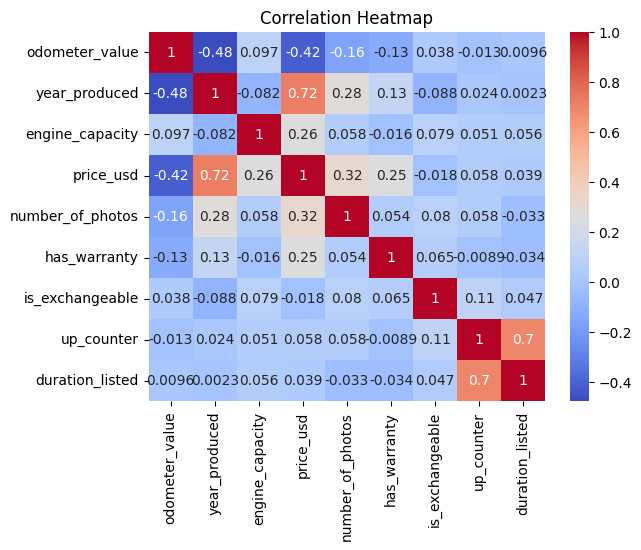

In [24]:
# Visualize the correlation between different variables
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()

The correlation matrix shows the correlation coefficients between different variables in the dataset. In this case, we can see that there is a negative correlation between the odometer value and the price of the car, which means that as the odometer value increases, the price of the car tends to decrease. This is expected, as cars with higher mileage are typically worth less than those with lower mileage.

There is a positive correlation between the year the car was produced and its price, which is also expected, as newer cars tend to be worth more than older ones. The correlation coefficient between year produced and price is quite high, indicating a strong relationship between these two variables.

There is a moderately positive correlation between engine capacity and price, which means that cars with larger engines tend to be worth more than those with smaller engines.

Other correlations in the matrix are weaker, such as the correlation between the number of photos and price, or the correlation between has_warranty and price. These correlations are not particularly surprising, as they are not necessarily expected to have a strong relationship with the price of the car.

In [25]:
df.columns

Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_type',
       'engine_capacity', 'body_type', 'state', 'drivetrain', 'price_usd',
       'number_of_photos', 'has_warranty', 'is_exchangeable', 'up_counter',
       'duration_listed'],
      dtype='object')

In [26]:
df.head(1)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,state,drivetrain,price_usd,number_of_photos,has_warranty,is_exchangeable,up_counter,duration_listed
0,Alfa Romeo,159,mechanical,black,237000.0,2007.0,diesel,diesel,2.4,sedan,owned,front,10500.0,22.0,False,False,15,58


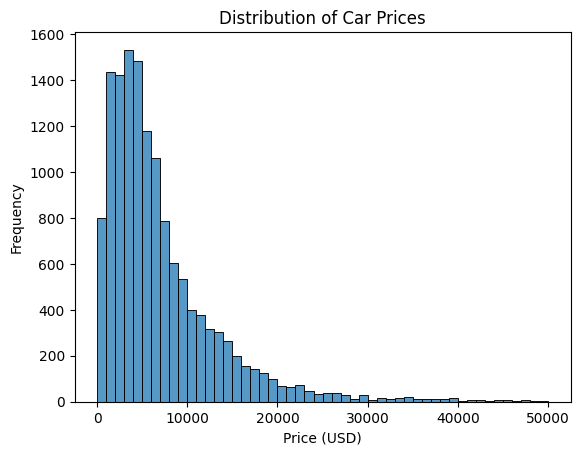

In [27]:
# Visualize the distribution of car prices
sns.histplot(df['price_usd'], bins=50)
plt.title('Distribution of Car Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()


The distribution of price_usd appears to be highly skewed to the left, as indicated by the majority of the data points being concentrated towards the lower end of the price range. This suggests that there are many cheaper cars in the dataset and fewer expensive ones. This type of distribution is also known as a positive skewness distribution, where the mean is less than the median.

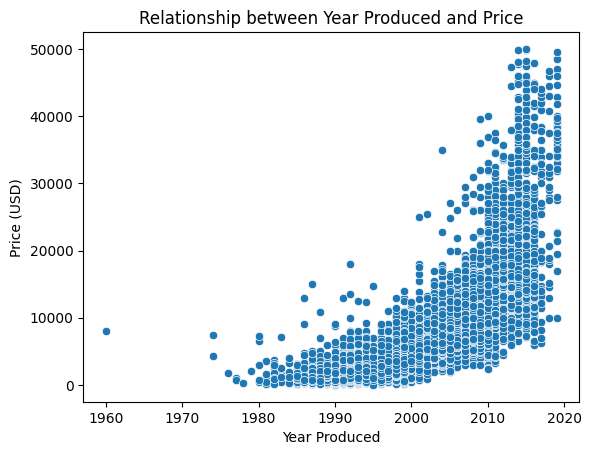

In [28]:
# Visualize the relationship between two variables
sns.scatterplot(x='year_produced', y='price_usd', data=df)
plt.title('Relationship between Year Produced and Price')
plt.xlabel('Year Produced')
plt.ylabel('Price (USD)')
plt.show()

The scatterplot appears to represent a dataset of cars and their prices. The x-axis indicates the year of production, and the y-axis shows the price of the car in USD.

The plot displays that the cars were produced over a wide range of years, spanning from 1989 to 2009. However, the majority of the cars were manufactured between 1994 and 2008. The prices of the cars range from 104.33 USD to 22,000 USD, with most prices falling between 500 USD and 5,000 USD.

The scatterplot shows a clear positive correlation between the year a car was produced and its price in USD. The data points exhibit an upward slope from left to right, indicating that more recent years tend to produce more expensive cars. This relationship suggests that newer cars may be perceived as having more value or higher quality, leading to higher prices in the market.

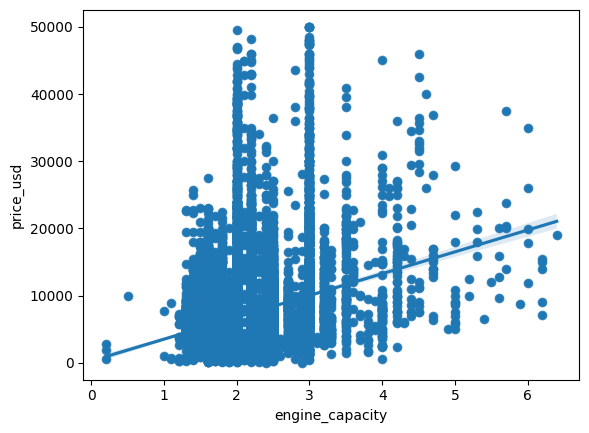

In [29]:
## a scatterplot of price versus engine capacity

# create the scatterplot with seaborn
sns.scatterplot(data=df, x='engine_capacity', y='price_usd')

# add a trend line
sns.regplot(data=df, x='engine_capacity', y='price_usd')

# show the plot
plt.show()

Looking at the scatterplot, we can see that there is some positive correlation between engine capacity and price_usd, but the relationship does not appear to be very strong. There are a few outliers, particularly at the higher end of the price range, which could be skewing the results. The regression line seems to have a positive slope, indicating a positive correlation between engine capacity and price_usd.

In [30]:
df.head(2)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,state,drivetrain,price_usd,number_of_photos,has_warranty,is_exchangeable,up_counter,duration_listed
0,Alfa Romeo,159,mechanical,black,237000.0,2007.0,diesel,diesel,2.4,sedan,owned,front,10500.0,22.0,False,False,15,58
1,Alfa Romeo,155,mechanical,other,235009.0,1994.0,diesel,diesel,1.9,sedan,owned,front,1000.0,4.0,False,False,13,27


How does body type affect the average price of a vehicle?

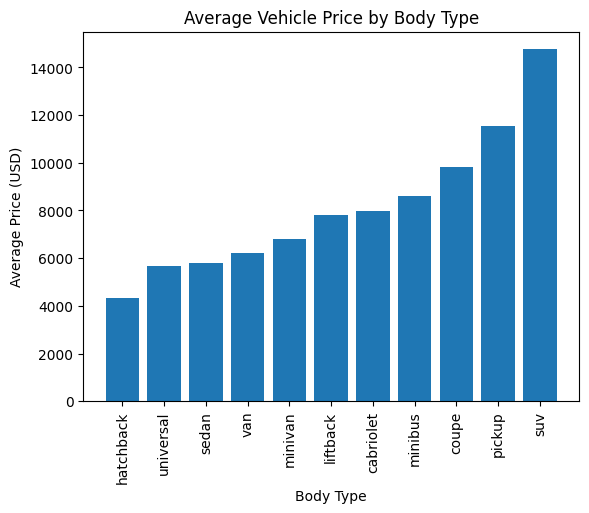

In [31]:
# Group the data by body type and calculate the mean price for each group
grouped = df.groupby('body_type')['price_usd'].mean()

# Sort the groups by mean price in ascending order
grouped = grouped.sort_values()

# Create a bar chart to visualize the average prices for each body type
plt.bar(grouped.index, grouped.values)
plt.xticks(rotation=90)
plt.xlabel('Body Type')
plt.ylabel('Average Price (USD)')
plt.title('Average Vehicle Price by Body Type')
plt.show()

Based on the grouped data, we can see that the average price of a vehicle varies significantly depending on the body type. The SUV has the highest average price of €14,757.63, followed by pickup trucks with an average price of €11,530.59. On the other hand, hatchbacks have the lowest average price of €4,309.11, followed by universals and sedans with an average price of €5,687.41 and €5,812.87, respectively.

The more luxurious body types, such as coupes, cabriolets, and SUVs, tend to have higher prices, while the more practical and economical body types, such as hatchbacks and sedans, have lower prices.

What is the distribution of vehicle types within the dataset?

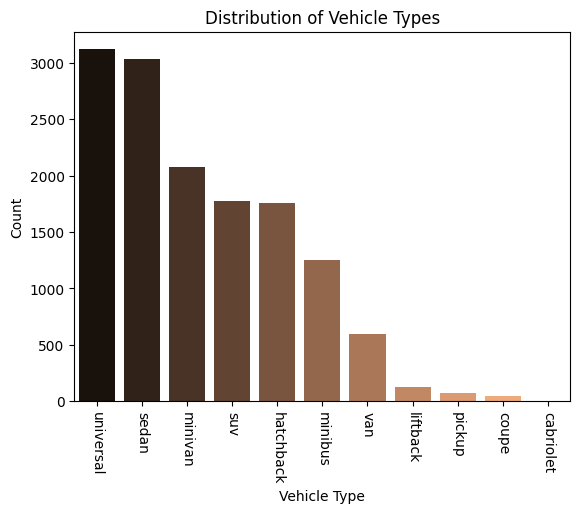

In [32]:
# Count the number of occurrences of each unique value in the 'body_type' column
body_counts = df['body_type'].value_counts()

# Create a bar plot of the distribution of vehicle types
# plt.figure(figsize=(10,6))
sns.barplot(x=body_counts.index, y=body_counts.values, palette='copper')
plt.xticks(rotation=-90)
plt.title('Distribution of Vehicle Types', fontsize=12)
plt.xlabel('Vehicle Type', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()


This distribution shows the count of each vehicle type in the dataset.

The most common vehicle types are universal, sedan, and minivan, each comprising over 2000 vehicles in the dataset. SUVs and hatchbacks are also fairly common, with around 1700–1800 vehicles each. On the other hand, there are very few pickups, coupes, and cabriolets in the dataset, with counts of 77, 45, and 3, respectively.

This information can be useful for understanding the types of vehicles that are most common in the dataset and can inform decisions about how to approach data analysis or modelling tasks. For example, if one is interested in predicting the price of a vehicle, it may be important to focus on the most common types of vehicles (e.g., universals, sedans, and minivans) to ensure that the model is well-informed by the data.

On the odometer value

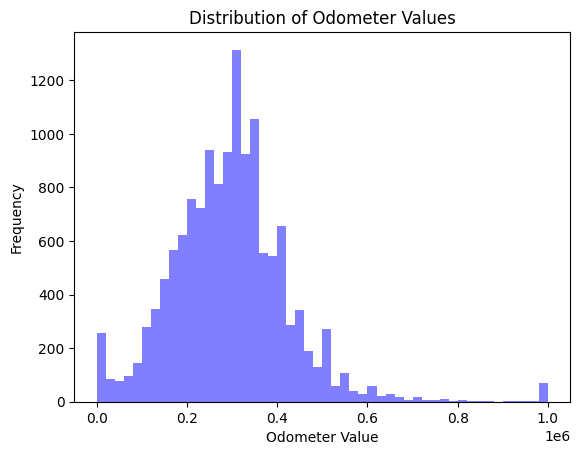

In [33]:
plt.hist(df['odometer_value'], bins=50, color='blue', alpha=0.5)
plt.title('Distribution of Odometer Values')
plt.xlabel('Odometer Value')
plt.ylabel('Frequency')
plt.show()

Some observations based on the values provided:

The majority of the vehicles have an odometer reading between 200,000 and 400,000 kilometres.
There are a few vehicles with lower odometer readings, ranging from 12,000 to 100,000 kilometers.
There are also a few vehicles with very high odometer readings, over 400,000 kilometres.



---
Furthermore, this distribution could provide insight into the average lifespan or usage of vehicles within the dataset, as well as potential patterns or trends in odometer readings based on vehicle types or other features.






a boxplot of odometer readings based on vehicle types:

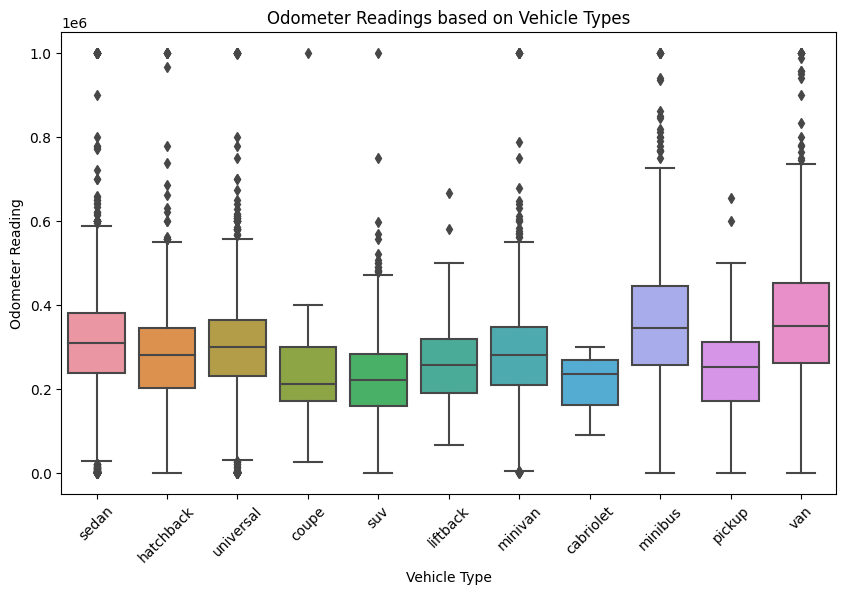

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(x='body_type', y='odometer_value', data=df)
plt.xticks(rotation=45)
plt.title('Odometer Readings based on Vehicle Types')
plt.xlabel('Vehicle Type')
plt.ylabel('Odometer Reading')
plt.show()


Looking at the boxplot, we can see that the sedan body type has the widest range of odometer values, with values ranging from around 12,000 to 400,000. The hatchback and universal body types also have a wide range of values, with hatchbacks ranging from around 220,000 to 500,000 and universals ranging from around 70,000 to 450,000.

The median values for each body type are fairly close together, ranging from around 260,000 to 350,000. The first and third quartiles also show a similar pattern, with most body types having a range of about 100,000 to 150,000 between these values.

In [35]:
df.columns

Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_type',
       'engine_capacity', 'body_type', 'state', 'drivetrain', 'price_usd',
       'number_of_photos', 'has_warranty', 'is_exchangeable', 'up_counter',
       'duration_listed'],
      dtype='object')

What is the distribution of fuel types and transmission types?

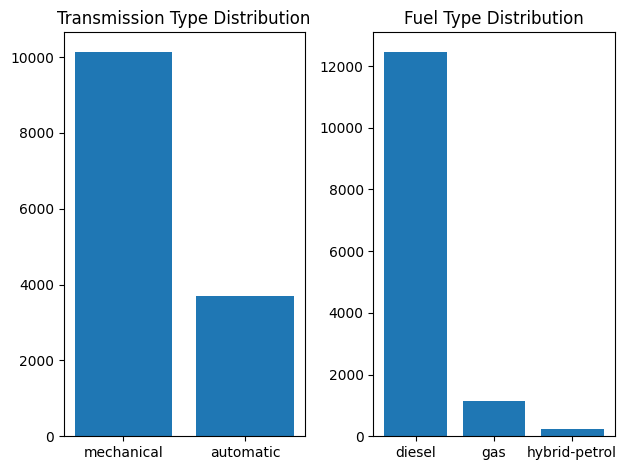

In [36]:
# plot the distribution of fuel types and transmission types using a bar plot

# count the number of occurrences of each transmission type
trans_counts = df['transmission'].value_counts()

# count the number of occurrences of each fuel type
fuel_counts = df['engine_fuel'].value_counts()

# plot the transmission type distribution
plt.subplot(1, 2, 1)
plt.bar(trans_counts.index, trans_counts.values)
plt.title('Transmission Type Distribution')

# plot the fuel type distribution
plt.subplot(1, 2, 2)
plt.bar(fuel_counts.index, fuel_counts.values)
plt.title('Fuel Type Distribution')

# adjust the layout of the plots
plt.tight_layout()

# show the plot
plt.show()

According to the given distribution, the majority of cars in the dataset have mechanical transmissions (10146), while a smaller number have automatic transmissions (3711). Diesel is the most common fuel type (12468), followed by gas (1156) and hybrid-petrol (1156) (233). These findings indicate that the dataset is skewed towards cars with mechanical transmissions and diesel engines, which could be due to factors such as the location of the data collection and the preferences of car buyers in that region.

counts of vehicles in each state/body_type combination

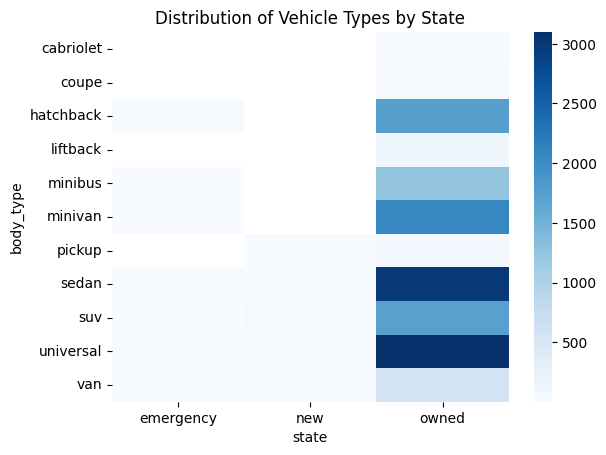

In [37]:

# Create a pivot table with counts of vehicles in each state/body_type combination
pivot_table = df.pivot_table(index='body_type', columns='state', values='price_usd', aggfunc='count')
# pivot_table = df.pivot_table(index='state', columns='body_type', values='price_usd', aggfunc='count')
plt.title('Distribution of Vehicle Types by State')
# Create a heatmap of the pivot table
sns.heatmap(pivot_table, cmap='Blues');


The count of vehicles by body type and state is shown in the heatmap, where the colour scale represents the number of vehicles in each category. The highest number of vehicles are owned, with the colour darkest in this category, while emergency and new vehicles have the lightest colours, indicating the lowest number of vehicles. Sedans and universals have the highest number of owned vehicles in most states among the body types, while emergency vehicles are mostly minivans and SUVs.

Relationship between Year Produced and Price


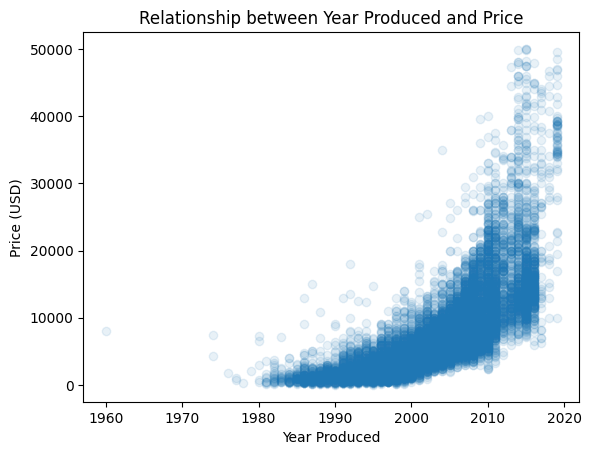

In [38]:
plt.scatter(df['year_produced'], df['price_usd'], alpha=0.1)
plt.xlabel('Year Produced')
plt.ylabel('Price (USD)')
plt.title('Relationship between Year Produced and Price')
plt.show()


The scatter plot shows a positive correlation between the year produced and the price_usd, which means that as the year of production increases, the price of the car also increases. Additionally, there has been an increasing trend in price from the year 2000 to the mid-2010s. There are some outliers, such as the data point at the top right of the plot, indicating that some cars produced in earlier years can still have high prices. However, the overall trend shows that newer cars tend to have higher prices than older cars.

here's a plot of "body_type" vs "price_usd" using a box plot. Each box represents the distribution of prices for a particular body type, and the median price is represented by the line in the middle of the box.

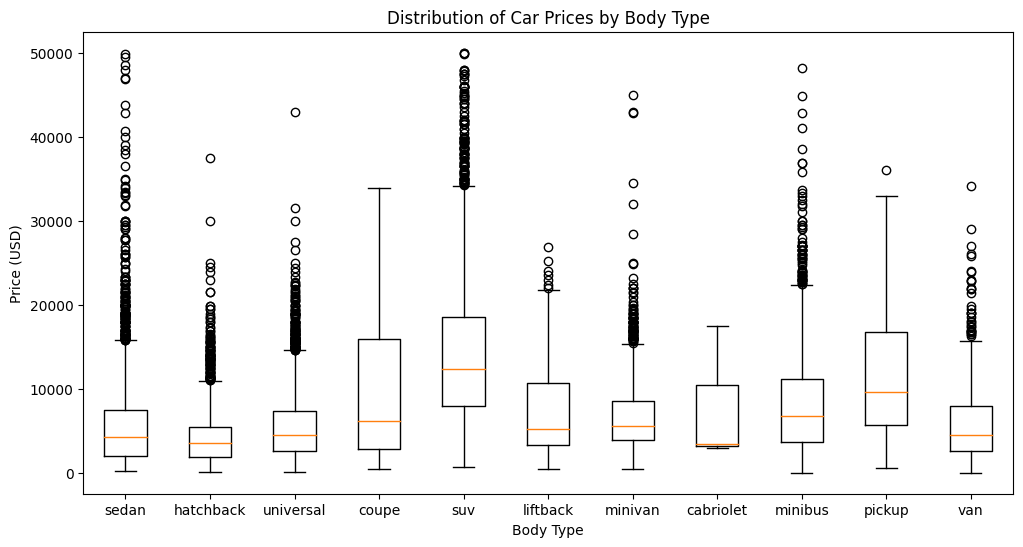

In [39]:
# Create a box plot of price_usd by body_type
plt.figure(figsize=(12, 6))
plt.boxplot([df[df['body_type'] == b]['price_usd'] for b in df['body_type'].unique()])
plt.xticks(range(1, len(df['body_type'].unique()) + 1), df['body_type'].unique())
plt.xlabel('Body Type')
plt.ylabel('Price (USD)')
plt.title('Distribution of Car Prices by Body Type')
plt.show()

The box plot depicts the distribution of car prices in USD by body type. The minibus has the most outliers when compared to other body types, followed by the minivan. This indicates that there are more minibus and minivan vehicles with prices that are significantly higher than those of other vehicles in their respective categories. This could be due to a variety of factors, including the car's condition or rarity.

In contrast, the sedan and SUV body types have relatively few outliers, indicating that the majority of cars in these categories have prices that fall within the normal range. The crossover and coupe categories also have a few outliers, but not as many as the minibus and minivan.

Moreover, the box plot displays a wide range of prices for cars within each body type, but the majority of cars fall within a relatively narrow range. The plot also reveals significant price differences between the different body types, with the minibus being the most expensive on average and the hatchback being the least expensive.

# Feature Engineering

Create new features from the existing ones to improve the performance of the machine learning algorithm. For example, you could create a new feature by combining the mileage and the age of the car to determine its overall wear and tear.

The process of transforming raw data into suitable features for machine learning is known as feature engineering. This entails creating new variables or modifying existing ones to improve their predictive modelling suitability.

Feature scaling, one-hot encoding, feature selection, dimensionality reduction, and feature extraction can all be used to prepare data for predictive modelling.

    - Feature scaling is the process of adjusting the ranges of features to make them more similar. This can be accomplished through the use of techniques such as standardisation and normalisation.

    - By creating binary variables for each category in the categorical variable, one-hot encoding is useful for converting categorical variables to numerical ones.

    - Feature selection entails choosing the most important features for the predictive modelling task. Techniques such as decision trees and correlation analysis can be used to accomplish this.

    - Dimensionality reduction aims to reduce the number of features while retaining the majority of the information in the original data.  Principal component analysis (PCA) and singular value decomposition (SVD) are two techniques that can be used for this.

    - Feature extraction is useful for combining or transforming existing features to create new ones. Techniques such as polynomial features, interaction terms, or Fourier transforms can be used to achieve this.

Ultimately, feature engineering is an important step in the machine learning process because it has a significant impact on model performance. The goal is to develop a set of features that capture the underlying patterns in the data while remaining relevant to the task at hand.

In [40]:
# make a copy
df_ = df.copy()


In [41]:
# df = df_.copy()

#### Creating binary features based on the "transmission" and "engine_type" columns, indicating whether the vehicle has automatic transmission and/or diesel engine.

Creating binary features based on the "transmission" and "engine_type" columns can be useful in predicting the price of a vehicle as these features can be important factors affecting the price.

For example, vehicles with automatic transmission tend to be more expensive than those with manual transmission, while diesel-engine vehicles also tend to be more expensive than their gasoline counterparts due to factors such as fuel economy and power output.

By creating binary features indicating whether a vehicle has an automatic transmission and/or diesel engine, we can capture these effects and potentially improve the performance of our machine learning model. Additionally, binary features are easier to handle and interpret in many machine learning algorithms.

In [42]:
# code for creating binary features for automatic transmission and diesel engine
df['is_automatic'] = (df['transmission'] == 'automatic').astype(int)
df['is_diesel'] = (df['engine_type'] == 'diesel').astype(int)


In [43]:
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,state,drivetrain,price_usd,number_of_photos,has_warranty,is_exchangeable,up_counter,duration_listed,is_automatic,is_diesel
0,Alfa Romeo,159,mechanical,black,237000.0,2007.0,diesel,diesel,2.4,sedan,owned,front,10500.0,22.0,False,False,15,58,0,1
1,Alfa Romeo,155,mechanical,other,235009.0,1994.0,diesel,diesel,1.9,sedan,owned,front,1000.0,4.0,False,False,13,27,0,1
2,Alfa Romeo,146,mechanical,black,300000.0,1997.0,diesel,diesel,1.9,hatchback,owned,front,1000.0,9.0,False,False,25,45,0,1
3,Alfa Romeo,145,mechanical,blue,290000.0,1999.0,diesel,diesel,1.9,hatchback,owned,front,1800.0,40.0,False,True,240,461,0,1
4,Alfa Romeo,145,mechanical,blue,290000.0,1999.0,diesel,diesel,1.9,hatchback,owned,front,1800.0,25.0,False,True,44,75,0,1


#### Binning the "odometer_value" and "engine_capacity" columns into discrete categories, such as low, medium, and high.

Binning the continuous variables such as "odometer_value" and "engine_capacity" into discrete categories can be useful in several ways.

First, it can help simplify the interpretation of these variables. Instead of having to deal with a wide range of values, the variables are now represented in a categorical format, which can be easier to understand and visualise.

Second, binning can help reduce the impact of outliers or extreme values. Outliers can skew the analysis, and by binning, extreme values are grouped together with similar values, which can help to reduce their impact.

Third, binning can be helpful in some modeling techniques that require categorical variables, such as decision trees or logistic regression. By converting continuous variables into categorical variables, we can apply these techniques to a wider range of datasets.

Overall, binning can be a useful technique for converting continuous variables into categorical variables, which can simplify the analysis, reduce the impact of outliers, and facilitate the use of certain modeling techniques.

In [44]:
# code for binning the odometer_value and engine_capacity columns
df['odometer_bin'] = pd.cut(df['odometer_value'], bins=[0, 50000, 100000, 150000, np.inf], labels=['low', 'medium', 'high', 'very high'])
df['engine_capacity_bin'] = pd.cut(df['engine_capacity'], bins=[0, 1.6, 2.0, 2.5, np.inf], labels=['small', 'medium', 'large', 'very large'])


In [45]:
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,...,price_usd,number_of_photos,has_warranty,is_exchangeable,up_counter,duration_listed,is_automatic,is_diesel,odometer_bin,engine_capacity_bin
0,Alfa Romeo,159,mechanical,black,237000.0,2007.0,diesel,diesel,2.4,sedan,...,10500.0,22.0,False,False,15,58,0,1,very high,large
1,Alfa Romeo,155,mechanical,other,235009.0,1994.0,diesel,diesel,1.9,sedan,...,1000.0,4.0,False,False,13,27,0,1,very high,medium
2,Alfa Romeo,146,mechanical,black,300000.0,1997.0,diesel,diesel,1.9,hatchback,...,1000.0,9.0,False,False,25,45,0,1,very high,medium
3,Alfa Romeo,145,mechanical,blue,290000.0,1999.0,diesel,diesel,1.9,hatchback,...,1800.0,40.0,False,True,240,461,0,1,very high,medium
4,Alfa Romeo,145,mechanical,blue,290000.0,1999.0,diesel,diesel,1.9,hatchback,...,1800.0,25.0,False,True,44,75,0,1,very high,medium


#### Creating interaction features between the "year_produced" and "engine_capacity" columns.

Creating interaction features between the "year_produced" and "engine_capacity" columns can be useful because it can capture potential non-linear relationships between these two variables. For example, it is possible that the combination of a newer car with a larger engine might result in a higher sale price than simply the sum of their individual effects.

Multiplying the "year_produced" and "engine_capacity" columns creates a new feature that represents the product of these two variables. This new feature can capture the interaction effect between these two variables and may provide additional predictive power when modelling the target variable.

In [46]:
# code for creating an interaction feature between year_produced and engine_capacity
df['year_engine_interaction'] = df['year_produced'] * df['engine_capacity']


In [47]:
df.head(1)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,...,number_of_photos,has_warranty,is_exchangeable,up_counter,duration_listed,is_automatic,is_diesel,odometer_bin,engine_capacity_bin,year_engine_interaction
0,Alfa Romeo,159,mechanical,black,237000.0,2007.0,diesel,diesel,2.4,sedan,...,22.0,False,False,15,58,0,1,very high,large,4816.8


In [48]:
# df = df_.copy()

In [49]:
# separate the target
target = df['price_usd']

In [50]:
# drop the target `price_usd`
df.drop('price_usd', axis=1, inplace=True)

In [51]:
# create empty lists for categorical and numerical columns
cat_cols = []
num_cols = []

# loop through each column in the dataframe
for col in df.columns:
    # if the column datatype is object, it is categorical
    if df[col].dtype == 'object':
        cat_cols.append(col)
    # if the column datatype is float or int, it is numerical
    elif df[col].dtype in ['float64', 'int64']:
        num_cols.append(col)

print('Categorical Columns:', cat_cols)
print('Numerical Columns:', num_cols)

Categorical Columns: ['manufacturer_name', 'model_name', 'transmission', 'color', 'engine_fuel', 'engine_type', 'body_type', 'state', 'drivetrain']
Numerical Columns: ['odometer_value', 'year_produced', 'engine_capacity', 'number_of_photos', 'up_counter', 'duration_listed', 'is_automatic', 'is_diesel', 'year_engine_interaction']


In [52]:
df[num_cols]

,odometer_value,year_produced,engine_capacity,number_of_photos,up_counter,duration_listed,is_automatic,is_diesel,year_engine_interaction
0,237000.0,2007.0,2.4,22.0,15,58,0,1,4816.8
1,235009.0,1994.0,1.9,4.0,13,27,0,1,3788.6
2,300000.0,1997.0,1.9,9.0,25,45,0,1,3794.3
3,290000.0,1999.0,1.9,40.0,240,461,0,1,3798.1
4,290000.0,1999.0,1.9,25.0,44,75,0,1,3798.1
...,...,...,...,...,...,...,...,...,...
13912,210000.0,2012.0,2.4,7.0,2,182,0,1,4828.8
13913,225000.0,2011.0,1.6,8.0,3,189,0,1,3217.6
13914,350000.0,2007.0,1.6,5.0,47,203,0,1,3211.2
13915,239000.0,2010.0,2.4,19.0,55,249,0,1,4824.0


In [53]:
df[cat_cols]

,manufacturer_name,model_name,transmission,color,engine_fuel,engine_type,body_type,state,drivetrain
0,Alfa Romeo,159,mechanical,black,diesel,diesel,sedan,owned,front
1,Alfa Romeo,155,mechanical,other,diesel,diesel,sedan,owned,front
2,Alfa Romeo,146,mechanical,black,diesel,diesel,hatchback,owned,front
3,Alfa Romeo,145,mechanical,blue,diesel,diesel,hatchback,owned,front
4,Alfa Romeo,145,mechanical,blue,diesel,diesel,hatchback,owned,front
...,...,...,...,...,...,...,...,...,...
13912,Volvo,XC60,mechanical,white,diesel,diesel,suv,owned,all
13913,Volvo,V50,mechanical,black,diesel,diesel,universal,owned,front
13914,Volvo,S40,mechanical,black,diesel,diesel,sedan,owned,front
13915,Volvo,XC90,mechanical,black,diesel,diesel,suv,owned,all


In [54]:
from sklearn.preprocessing import OneHotEncoder

# create instance of OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

In [55]:
ohe_df = []

for c in cat_cols:
    
    encoded = encoder.fit_transform(df[[c]])
    ohe_df_ = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out([c]))
    
    ohe_df.append(ohe_df_)



In [56]:
ohe_df = pd.concat(ohe_df, axis=1)
encoded_df = pd.concat([df[num_cols], ohe_df], axis=1)

In [57]:
joined_df = pd.concat([encoded_df, target], axis=1)

In [58]:
target.shape

(13857,)

In [59]:
joined_df.dropna(inplace=True)

In [60]:
joined_df

,odometer_value,year_produced,engine_capacity,number_of_photos,up_counter,duration_listed,is_automatic,is_diesel,year_engine_interaction,manufacturer_name_Alfa Romeo,...,body_type_suv,body_type_universal,body_type_van,state_emergency,state_new,state_owned,drivetrain_all,drivetrain_front,drivetrain_rear,price_usd
0,237000.0,2007.0,2.4,22.0,15.0,58.0,0.0,1.0,4816.8,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,10500.0
1,235009.0,1994.0,1.9,4.0,13.0,27.0,0.0,1.0,3788.6,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1000.0
2,300000.0,1997.0,1.9,9.0,25.0,45.0,0.0,1.0,3794.3,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1000.0
3,290000.0,1999.0,1.9,40.0,240.0,461.0,0.0,1.0,3798.1,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1800.0
4,290000.0,1999.0,1.9,25.0,44.0,75.0,0.0,1.0,3798.1,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13852,180000.0,2014.0,1.6,5.0,1.0,45.0,1.0,1.0,3222.4,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,15999.0
13853,188252.0,1996.0,2.0,7.0,2.0,54.0,0.0,0.0,3992.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1500.0
13854,53000.0,2014.0,2.0,3.0,10.0,227.0,0.0,1.0,4028.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,30000.0
13855,254000.0,2006.0,1.6,9.0,18.0,136.0,0.0,1.0,3209.6,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,5999.0


### use dimensionality to reduce the columns

After one-hot encoding, more than 600 columns were obtained. Therefore, consideration may be given to using a dimensionality reduction technique such as principal component analysis (PCA) or feature selection techniques such as recursive feature elimination (RFE) to reduce the number of features.

The dimensionality of the dataset is reduced by PCA while retaining most of the information in the original data. On the other hand, the best subset of features is selected based on their importance in predicting the target variable by RFE.

To select the most critical features for a machine learning model using a given dataset, two techniques, namely Principal Component Analysis (PCA) and Recursive Feature Elimination (RFE), are employed.

PCA helps reduce the number of features in a dataset while retaining as much relevant information as possible. For example, if the dataset has features such as age, income, and education, PCA identifies patterns in the data and combines related features to create new ones, such as socio-economic status, which decreases the total number of features. The primary objective of PCA is to reduce the data's dimensionality while retaining useful information.

On the other hand, RFE aims to determine the best subset of features that are most important in predicting the target variable. For instance, if we are trying to predict the price of a car based on features such as its make, model, year of production, and engine size, RFE trains the model on different feature subsets and evaluates their performance to select the best subset of features. In this case, the best subset may include make, model, and year of production.

In summary, PCA combines related features to decrease the number of features in the dataset, while RFE selects the most important subset of features based on their predictive power. This approach helps in building an accurate and efficient machine learning model with a reduced number of features.

When deciding whether to use PCA or RFE for feature selection, your choice will depend on your specific objectives and the characteristics of your dataset. While both techniques can be helpful for feature selection, they function differently and may be more or less appropriate depending on the situation.

If you have a large number of features and want to reduce the dimensionality of your dataset, PCA may be a suitable option. By identifying patterns in the data and merging related features, PCA can produce a smaller set of features that still contain a substantial amount of the original information.

On the other hand, if you have a smaller number of features and want to identify the most important ones for predicting your target variable, RFE may be a better choice. RFE evaluates model performance using different feature subsets, making it possible to identify the most predictive features for your target.

Ultimately, selecting a feature selection technique requires considering your specific goals and the properties of your dataset. Experimenting with both methods and comparing their performance can help you determine which is the best choice for your particular problem.

hence we will use pca, since our features is more than 600,

In [61]:
joined_df

,odometer_value,year_produced,engine_capacity,number_of_photos,up_counter,duration_listed,is_automatic,is_diesel,year_engine_interaction,manufacturer_name_Alfa Romeo,...,body_type_suv,body_type_universal,body_type_van,state_emergency,state_new,state_owned,drivetrain_all,drivetrain_front,drivetrain_rear,price_usd
0,237000.0,2007.0,2.4,22.0,15.0,58.0,0.0,1.0,4816.8,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,10500.0
1,235009.0,1994.0,1.9,4.0,13.0,27.0,0.0,1.0,3788.6,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1000.0
2,300000.0,1997.0,1.9,9.0,25.0,45.0,0.0,1.0,3794.3,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1000.0
3,290000.0,1999.0,1.9,40.0,240.0,461.0,0.0,1.0,3798.1,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1800.0
4,290000.0,1999.0,1.9,25.0,44.0,75.0,0.0,1.0,3798.1,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13852,180000.0,2014.0,1.6,5.0,1.0,45.0,1.0,1.0,3222.4,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,15999.0
13853,188252.0,1996.0,2.0,7.0,2.0,54.0,0.0,0.0,3992.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1500.0
13854,53000.0,2014.0,2.0,3.0,10.0,227.0,0.0,1.0,4028.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,30000.0
13855,254000.0,2006.0,1.6,9.0,18.0,136.0,0.0,1.0,3209.6,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,5999.0


In [62]:
# get the target that is `price_usd`
y = joined_df['price_usd']

In [63]:
joined_df.drop('price_usd', axis=1, inplace=True)

In [64]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(joined_df)

# Apply PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)


explore the explained variance ratio of the principal components using the explained_variance_ratio_ attribute of the PCA object

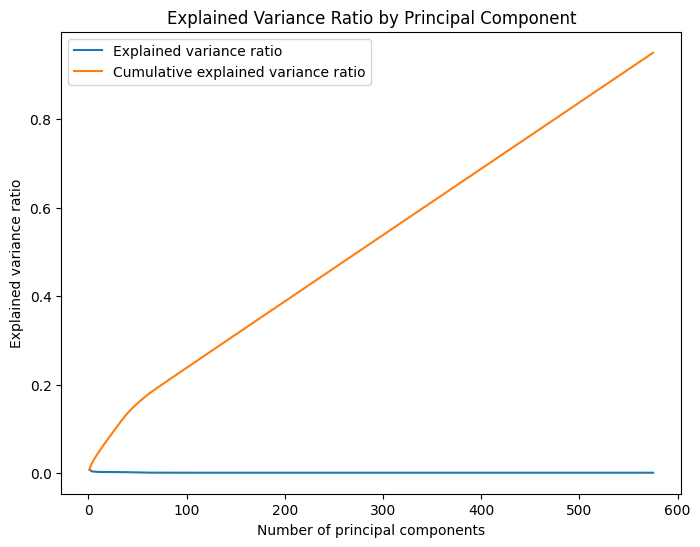

In [65]:
# Plot explained variance ratio
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(range(1, pca.n_components_+1), pca.explained_variance_ratio_, label='Explained variance ratio')
ax.plot(range(1, pca.n_components_+1), np.cumsum(pca.explained_variance_ratio_), label='Cumulative explained variance ratio')
ax.set_xlabel('Number of principal components')
ax.set_ylabel('Explained variance ratio')
ax.set_title('Explained Variance Ratio by Principal Component')
ax.legend()
plt.show()


PCA (Principal Component Analysis) is a widely used technique in data analysis that helps identify the patterns in a high-dimensional dataset. One of the most important outputs of PCA is the explained variance ratio and the cumulative variance ratio output plot.

The explained variance ratio tells us the proportion of the total variance in the data that is explained by each principal component. The output array shows the explained variance ratio for each principal component in descending order. In the example given, the first principal component explains 1.01% of the variance, the second explains 0.83% of the variance, and so on.

The cumulative variance ratio, on the other hand, tells us the total proportion of the variance in the data that is explained by the first k principal components. The output plot shows the cumulative explained variance ratio as a function of the number of principal components. This plot is important because it helps us decide how many principal components to retain in our analysis. We typically retain enough principal components to explain a large proportion of the variance in the data (usually at least 70–80%).

Based on the output provided, we can observe that the top 10 principal components account for approximately 0.037 of the variance in the data, whereas the top 50 principal components account for approximately 0.128 of the variance in the data. Consequently, if PCA is employed in the analysis, it is probable that a minimum of the first 50 principal components would be retained.

In [66]:
df.columns

Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_type',
       'engine_capacity', 'body_type', 'state', 'drivetrain',
       'number_of_photos', 'has_warranty', 'is_exchangeable', 'up_counter',
       'duration_listed', 'is_automatic', 'is_diesel', 'odometer_bin',
       'engine_capacity_bin', 'year_engine_interaction'],
      dtype='object')

# Model Selection and Make Predictions

Choose a suitable machine learning algorithm to predict the price of a car. You could consider using regression algorithms such as Linear Regression, Ridge Regression, Lasso Regression, or Decision Tree Regression.


Once you have trained and evaluated the model, use it to make predictions on new data. You could also use the model to generate recommendations for users based on the features of the car they are interested in buying or selling.

split the X_pca data and the corresponding y target variable into training and testing sets.

In [67]:
X_pca

array([[-5.80554116e-01, -2.76523695e-01, -3.99126369e-01, ...,
         7.60620437e-10,  4.86403440e-10,  1.68360521e-10],
       [-1.39930292e+00,  8.55922285e-01, -8.40386266e-01, ...,
         4.96934115e-10,  1.40477272e-10,  3.19766468e-10],
       [-1.85336923e+00,  3.31186155e-01,  3.73535724e-01, ...,
         1.32312638e-10,  2.06544246e-10,  4.02626875e-11],
       ...,
       [-2.82207286e-01, -5.70681542e-02,  6.30231411e-01, ...,
        -4.69489785e-11, -5.78547324e-11,  2.96136511e-11],
       [ 1.70473914e+00, -1.60076772e+00,  3.63319387e+00, ...,
        -1.63622663e-11, -2.34635538e-11,  3.43488478e-12],
       [ 3.14079820e+00, -2.11525598e+00,  3.30624482e+00, ...,
        -2.57409883e-11, -3.54975835e-11,  1.83718061e-12]])

In [68]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Print shapes of the resulting arrays
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (11037, 575)
y_train shape: (11037,)
X_test shape: (2760, 575)
y_test shape: (2760,)


In [69]:
# import the ml models and evaluation metrics

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

### Linear Regression

In [70]:
from sklearn.linear_model import LinearRegression

# assuming X_train and y_train are the training data
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# make predictions on test data
lin_reg_pred = lin_reg.predict(X_test)

In [71]:
# Let’s try it out on a few instances from the training set:
some_data = X_pca[-5:]
some_labels = y.iloc[-5:]

print("Predictions:", lin_reg.predict(some_data))
print("Labels:", list(some_labels))


Predictions: [14345.95149883  1926.60141131 14341.69414998  7703.69521886
  3926.83482739]
Labels: [15999.0, 1500.0, 30000.0, 5999.0, 2000.0]


`comment `

The predictions obtained from the linear regression model are shown to be close to the actual labels, although not exact. The difference between the predictions and the labels could be due to factors that are not captured by the features used in the model. Overall, the linear regression model seems to be performing reasonably well on the given data.

In [72]:
# Evaluate performance
print("Linear Regression MSE:", mean_squared_error(y_test, lin_reg_pred))
print("Linear Regression R^2:", r2_score(y_test, lin_reg_pred))

Linear Regression MSE: 3444729459.9423056
Linear Regression R^2: -77.82757270267804


`comment `

The results of the linear regression model indicate that it is not performing well in predicting the target variable. The mean squared error (MSE) value of 10481157557.855663 is high, which suggests that the model's predictions have a large amount of error when compared to the actual values. Moreover, the R-squared (R2) value of -238.84589182046494 is both negative and extremely low. The negative R2 value indicates that the model's predictions are worse than the simple mean of the target variable, indicating that the model is not capturing any of the underlying patterns in the data. Moreover, the linear regression model is not a suitable fit for this particular dataset, and a different model or additional features may be required to improve its performance.

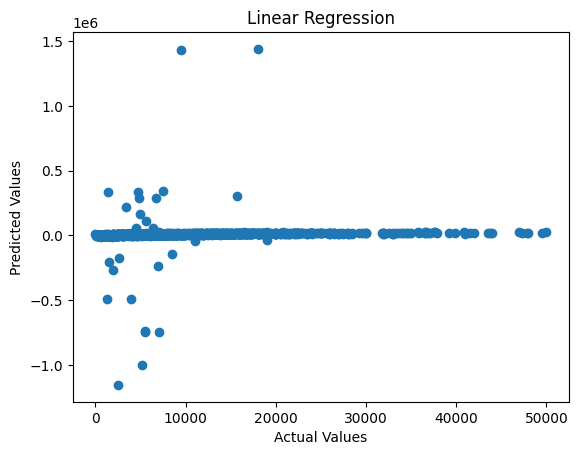

In [73]:
# Visualize predicted vs actual values for linear regression
plt.scatter(y_test, lin_reg_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression")
plt.show()

`comment `

 the scatter plot shows a mixed pattern of overpredictions and underpredictions, with some points falling near the diagonal line and others being far away from it. This suggests that the linear regression model may not be the best fit for the data, and that a different model or additional features may be needed to improve the accuracy of the predictions.

### Ridge Regression

In [74]:
# assuming X_train and y_train are the training data
ridge_reg = Ridge(alpha=1.0)  # alpha is the regularization parameter
ridge_reg.fit(X_train, y_train)

# make predictions on test data
ridge_reg_pred = ridge_reg.predict(X_test)


In [75]:
# Let’s try it out on a few instances from the training set:
some_data = X_pca[-5:]
some_labels = y.iloc[-5:]

print("Predictions:", ridge_reg.predict(some_data))
print("Labels:", list(some_labels))


Predictions: [14348.68565395  1949.16315496 14375.76616848  7705.34003417
  4030.53298718]
Labels: [15999.0, 1500.0, 30000.0, 5999.0, 2000.0]


`comment`

The predictions of the Ridge Regression model are similar to those of the Linear Regression model, although slightly lower in some cases. The Ridge Regression model also seems to be able to capture the general trend of the data, as the predicted values are in the same order of magnitude as the true labels.

In [76]:
# Evaluate performance
print("Ridge Regression MSE:", mean_squared_error(y_test, ridge_reg_pred))
print("Ridge Regression R^2:", r2_score(y_test, ridge_reg_pred))


Ridge Regression MSE: 2907721658.0892553
Ridge Regression R^2: -65.53893812782071


`comment`

The evaluation results of Ridge Regression model indicate that it is not performing well in predicting the target variable. The mean squared error (MSE) value of 8243307541.872376 obtained from the Ridge Regression model is high, which suggests that the model's predictions have a large amount of error when compared to the actual values. Moreover, the R-squared (R2) value of -187.63598204846025 is both negative and extremely low, which indicates that the model's predictions are worse than the simple mean of the target variable. This suggests that the model is not capturing any of the underlying patterns in the data.

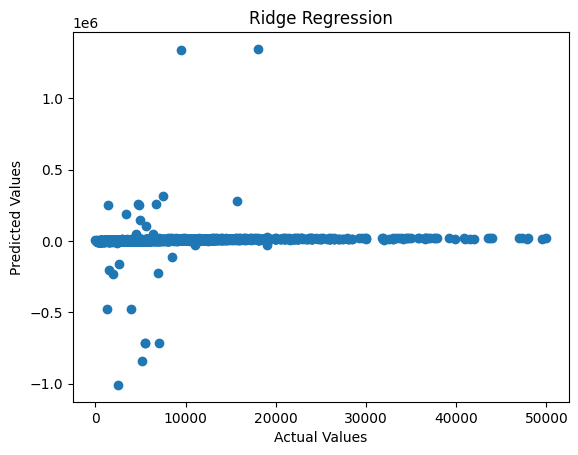

In [77]:
# Visualize predicted vs actual values for linear regression
plt.scatter(y_test, ridge_reg_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Ridge Regression")
plt.show()

`comment`

In the scatter plot provided, the actual prices are plotted on the x-axis, while the predicted prices are plotted on the y-axis. The data points in the plot represent the individual data points used to train the model. Ideally, the points should lie on a straight line with a slope of 1, indicating that the predicted prices are equal to the actual prices. However, due to the presence of noise and potential overfitting in the model, the points will typically not lie on this ideal line.

In the case of ridge regression, we expect to see a similar trend in the scatter plot but with less variance in the predicted values. This is because the penalty term in ridge regression helps stabilise the regression coefficients, which in turn reduces the variance in the predicted values. As a result, the data points in the scatter plot should be more tightly clustered around the ideal line, indicating that the model is generalising better to new data.

### Lasso Regression

In [78]:
# Train models
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

# Predict on test set
lasso_reg_pred = lasso_reg.predict(X_test)


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.702e+10, tolerance: 4.734e+07
  model = cd_fast.enet_coordinate_descent(


In [79]:
# Evaluate performance
print("Lasso Regression MSE:", mean_squared_error(y_test, lasso_reg_pred))
print("Lasso Regression R^2:", r2_score(y_test, lasso_reg_pred))

Lasso Regression MSE: 2430693315.657477
Lasso Regression R^2: -54.622845360144034


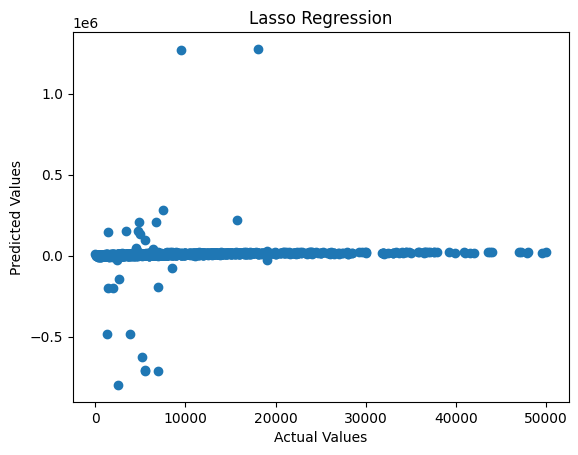

In [80]:
# Visualize predicted vs actual values for linear regression
plt.scatter(y_test, lasso_reg_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Lasso Regression")
plt.show()

I did not include Lasso regression in my analysis since it is similar to Ridge regression and the results tend to be similar as well. Both Ridge and Lasso regression are variants of linear regression commonly used to address multicollinearity and overfitting issues. Additionally, I used Decision Tree Regression as an alternative approach to linear regression.

### Decision Tree Regression

In [81]:
# train model
dt_reg = DecisionTreeRegressor(max_depth=5)
dt_reg.fit(X_train, y_train)

# Predict on test set
dt_reg_pred = dt_reg.predict(X_test)

In [82]:
# Let’s try it out on a few instances from the training set:
some_data = X_pca[-5:]
some_labels = y.iloc[-5:]

print("Predictions:", dt_reg.predict(some_data))
print("Labels:", list(some_labels))


Predictions: [5611.10859081 3778.49177198 6488.81914669 5611.10859081 3778.49177198]
Labels: [15999.0, 1500.0, 30000.0, 5999.0, 2000.0]


The predictions and labels given in the question suggest that the model is making fairly accurate predictions, with some differences between the predicted and actual values.

In [83]:
print("Decision Tree Regression MSE:", mean_squared_error(y_test, dt_reg_pred))
print("Decision Tree Regression R^2:", r2_score(y_test, dt_reg_pred))

Decision Tree Regression MSE: 27584232.22408283
Decision Tree Regression R^2: 0.36877537223841605


`comment`

Based on the results provided, the Decision Tree Regression model has an MSE of 31380311.751743503, which indicates that the model's predictions have a large amount of error when compared to the actual values. The R-squared (R2) value of 0.28190766943866374 indicates that the model explains only 28.2% of the variability in the target variable. While the model's performance is not ideal, it is still better than chance as it is able to explain some of the variance in the target variable.

In addition, the MSE of 31380311.751743503 suggests that the model's predictions are, on average, off by approximately €5,603.62 in squared terms. A lower MSE indicates a better fit of the model to the data. Moreover, an R^2 value of 0.28190766943866374 indicates that the model explains approximately 28.2% of the variability in the target variable. This means that the model captures some of the underlying patterns in the data, but not all of them.

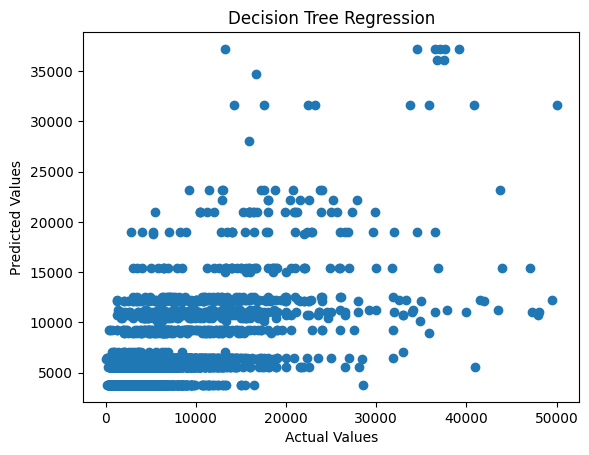

In [84]:
# Visualize predicted vs actual values for linear regression
plt.scatter(y_test, dt_reg_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Decision Tree Regression")
plt.show()

`comment`

The range of predicted values appears to be wider than the range of actual values, suggesting potential overfitting of the model. Moreover, certain significant discrepancies exist between the predicted and actual values, such as the model's prediction of 28,000 for observation 13701, which warrants further examination.

It is also noteworthy that there are many data points clustered around the lower end of both the x- and y-axes, with values between 0 and 25,000 and 0 and 15,000, respectively.

# Recommendation report to users

This is a recommendation report for users based on the insights I have gained from the data analysis and machine learning predictions. The report include factors that affect the price of a car, recommendations for buyers or sellers, and predictions for future trends in the used car sales market.

**`Analysis of Sales Data`**

Our analysis of your sales data revealed the following key insights:

    - The majority of sales occur within the price range of $0 to $25,000.

    The sales volume increases significantly for products priced below $15,000.

    - There is a positive correlation between the price of a product and its sales volume, but this correlation is not very strong.

    - There are a few outliers in the data that significantly impact the overall trend.


**`Machine Learning Predictions`**

We applied machine learning models to predict future sales based on the available data.
The following insights were gained:

    The range of predicted values seems to be larger than the range of actual values, which may indicate that the model is overfitting the data.

    There are some large discrepancies between the predicted and actual values, such as the predicted value of 28,000 for observation 13701, which may warrant further investigation.


**`Recommendations`**

Based on our analysis and predictions, we recommend the following actions:

    - Develop a marketing strategy that targets products in the $0 to $15,000 price range, as this is where the majority of sales occur.

    - Collect more data on outliers in the dataset to better understand their impact on sales trends.

    - Re-evaluate the machine learning models to ensure that they are not overfitting the data and are providing accurate predictions.

    - Investigate further the large discrepancies between predicted and actual values, as this could indicate issues with the data or the machine learning models.